In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [116]:
df= pd.read_csv(r"C:\Users\16479\Downloads\Customer_Data.csv")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [118]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [119]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


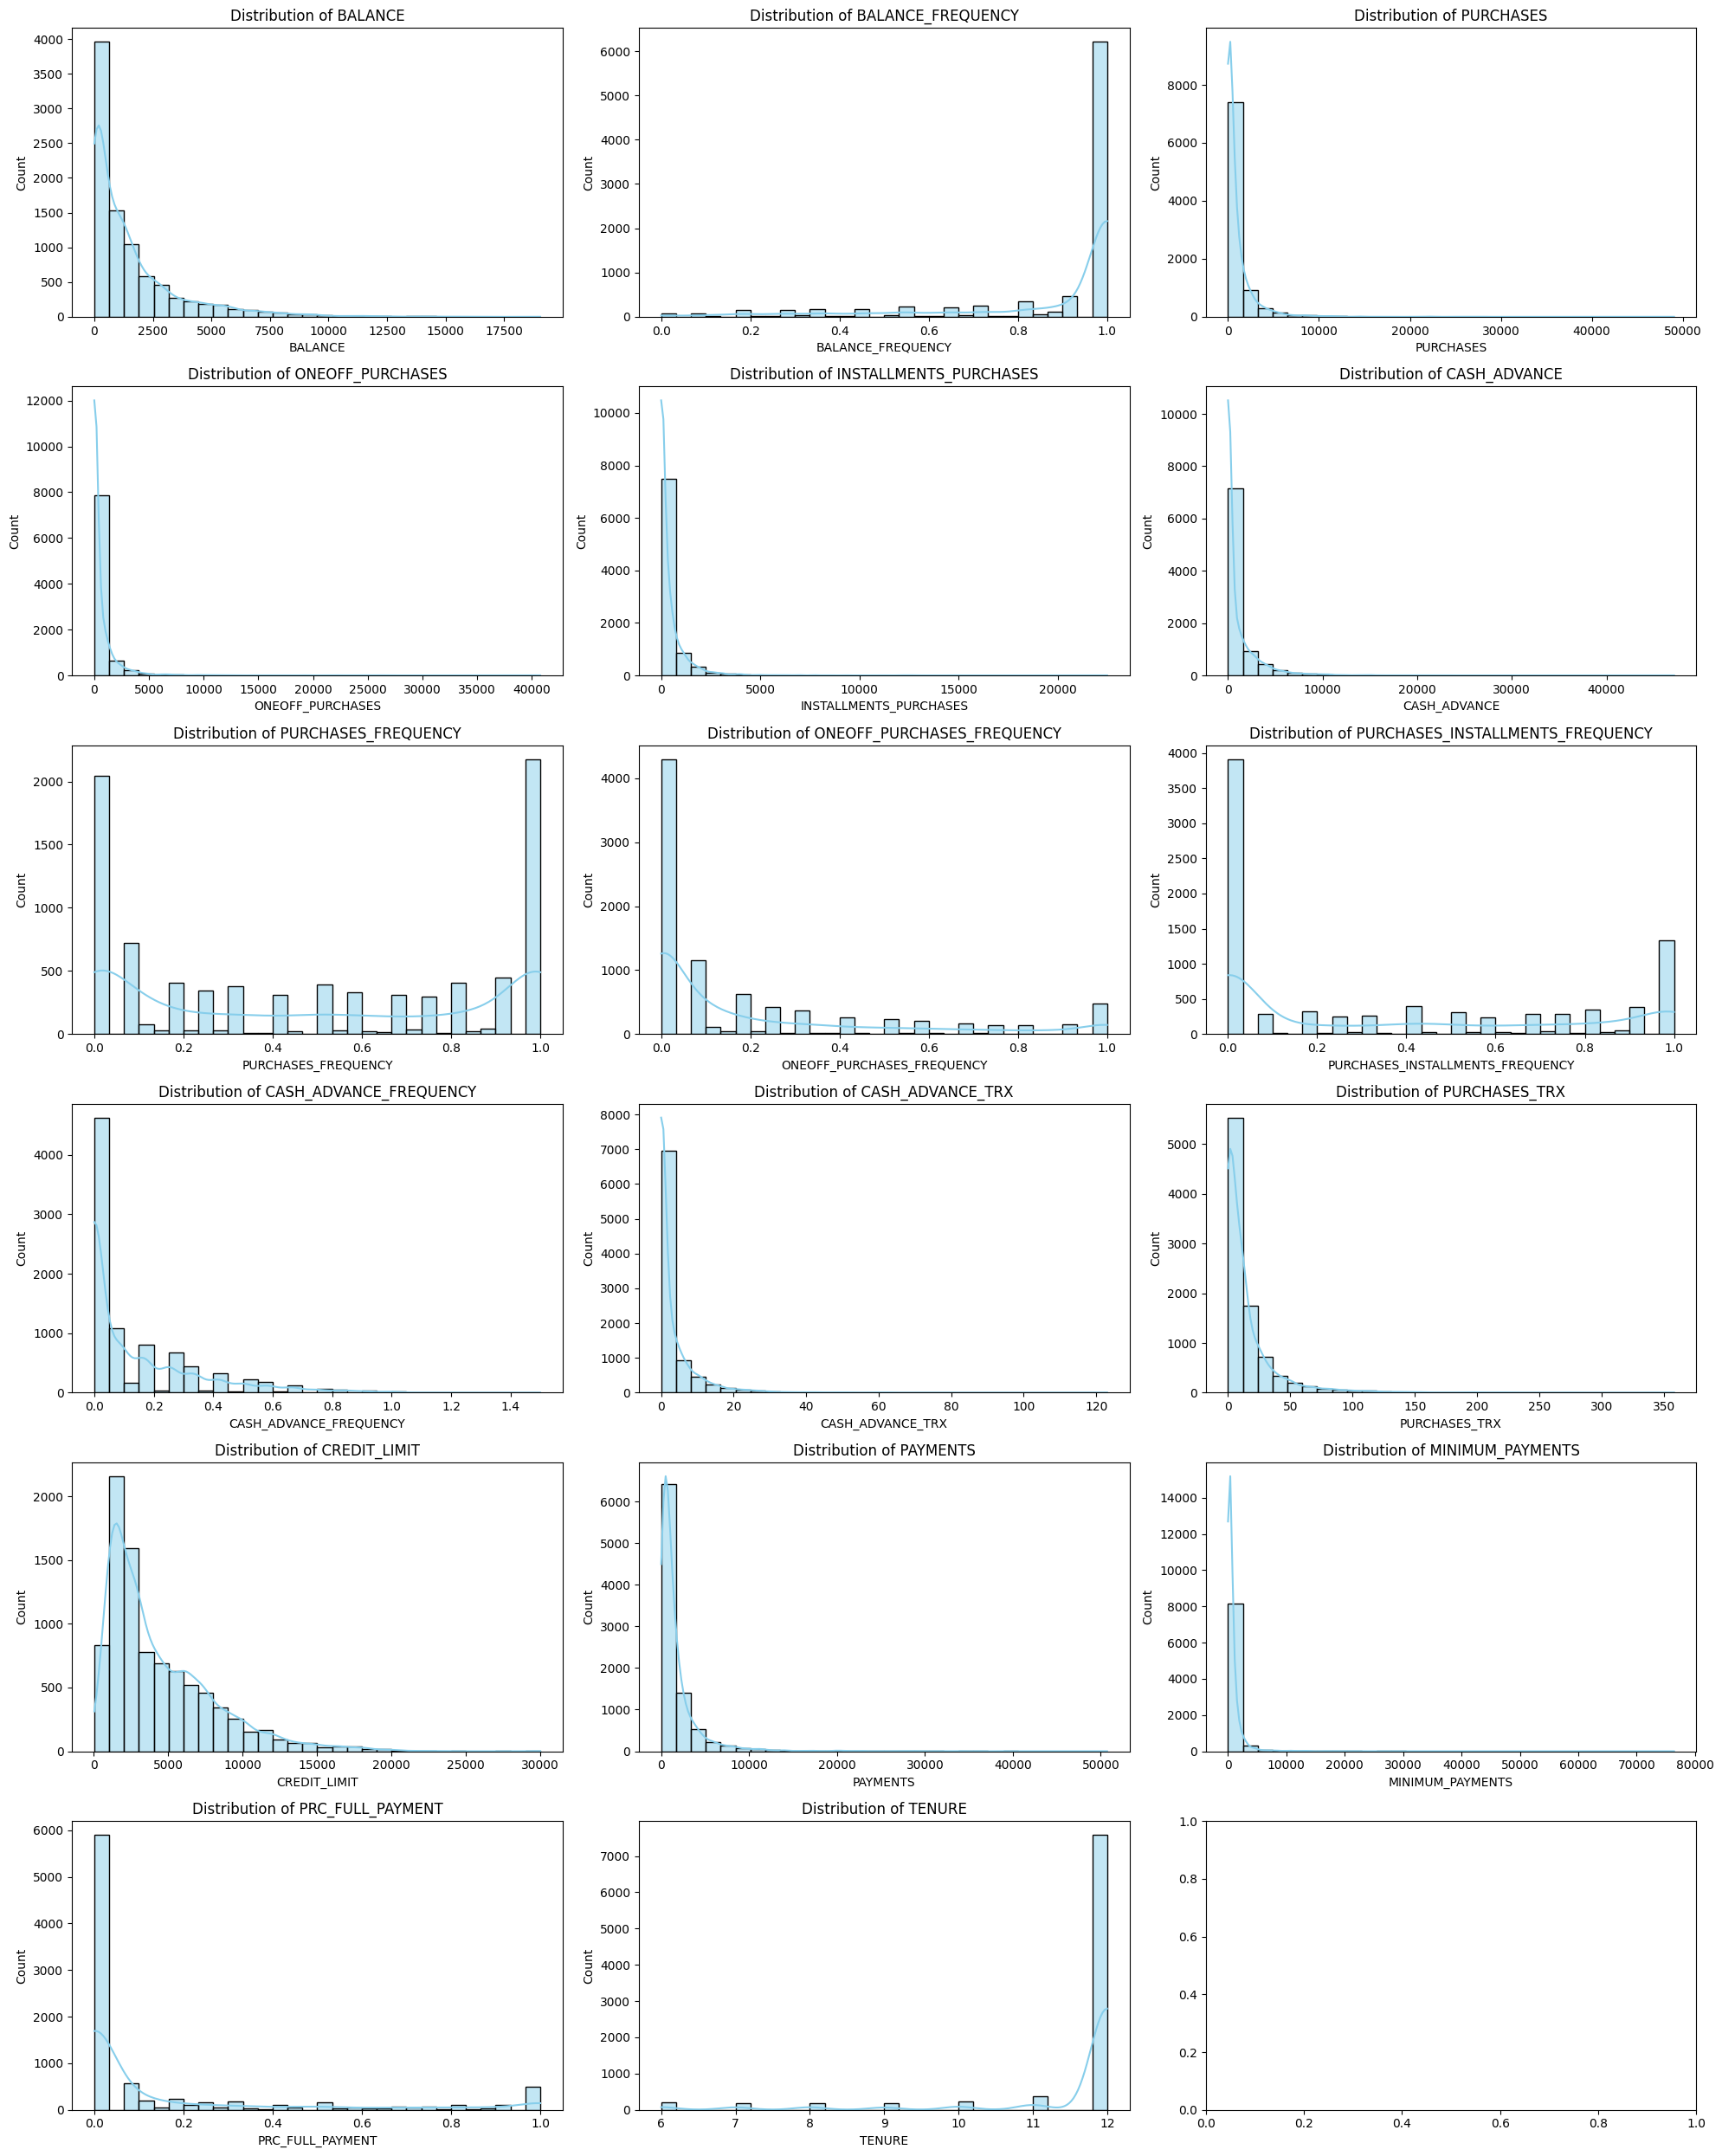

In [120]:
numerical_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Setting up subplots for histplot
fig, axes = plt.subplots(6, 3, figsize=(20, 25))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting histplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column].dropna(), kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [121]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [122]:
df = df.dropna()

IndexError: index 15 is out of bounds for axis 0 with size 15

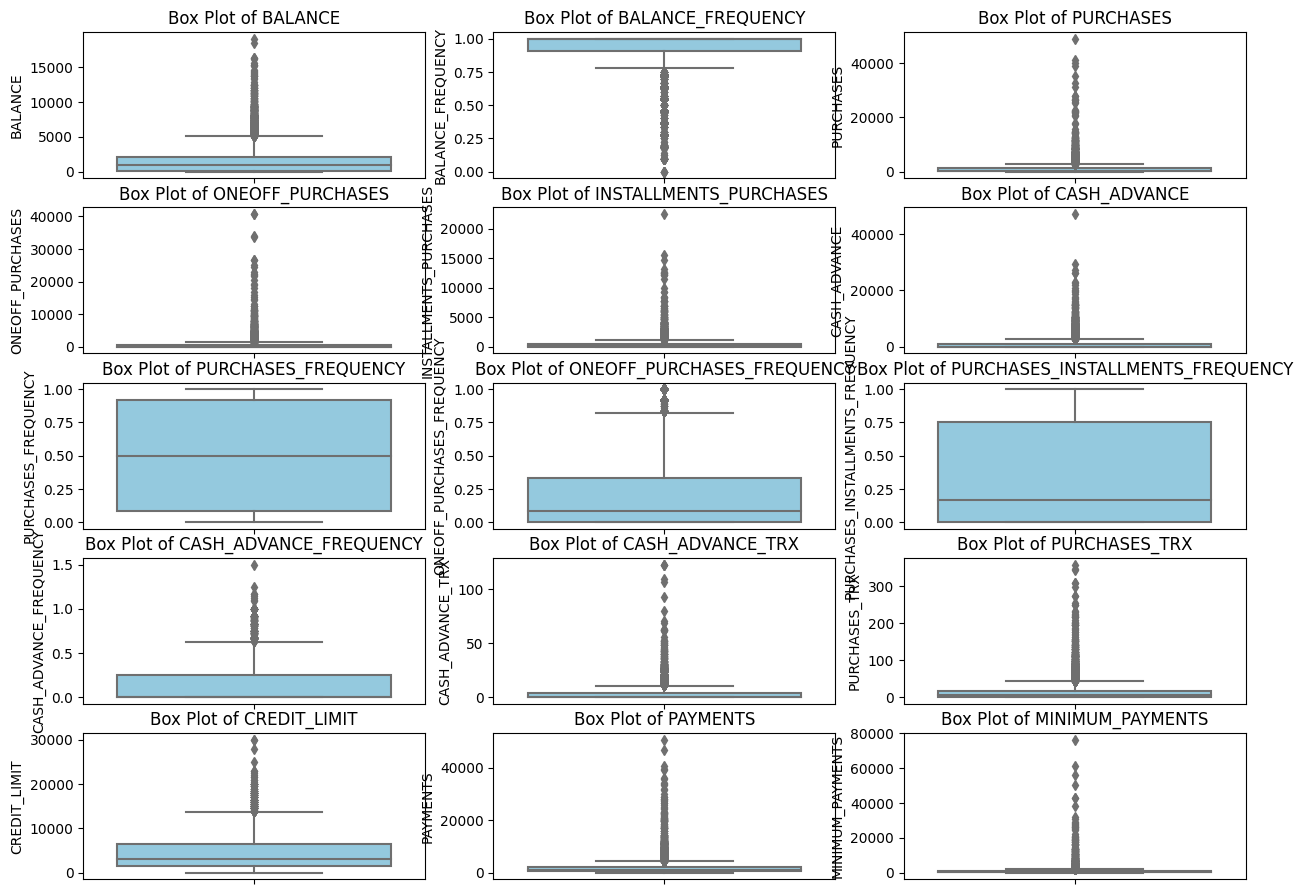

In [123]:
# Assuming 'df' is the original DataFrame
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Setting up subplots for box plots
fig, axes = plt.subplots(nrows=len(df_numeric.columns)//3, ncols=3, figsize=(15, 2*len(df_numeric.columns)//3))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting box plots for each numeric feature
for i, column in enumerate(df_numeric.columns):
    # Convert NumPy array to Pandas Series
    sns.boxplot(y=pd.Series(df[column]), ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
print(len(df[df['BALANCE'] > 7000]))


278


In [ ]:
df = df[df['BALANCE'] <= 7000]

In [ ]:
print(len(df[df['CREDIT_LIMIT'] > 12000]))

142


In [ ]:
df = df[df['CREDIT_LIMIT'] <= 12000]

In [ ]:
df = df[df['PURCHASES'] <= 5000]

In [ ]:
df = df[df['CASH_ADVANCE'] <= 8000]

In [ ]:
df = df[df['PAYMENTS'] <= 7000]

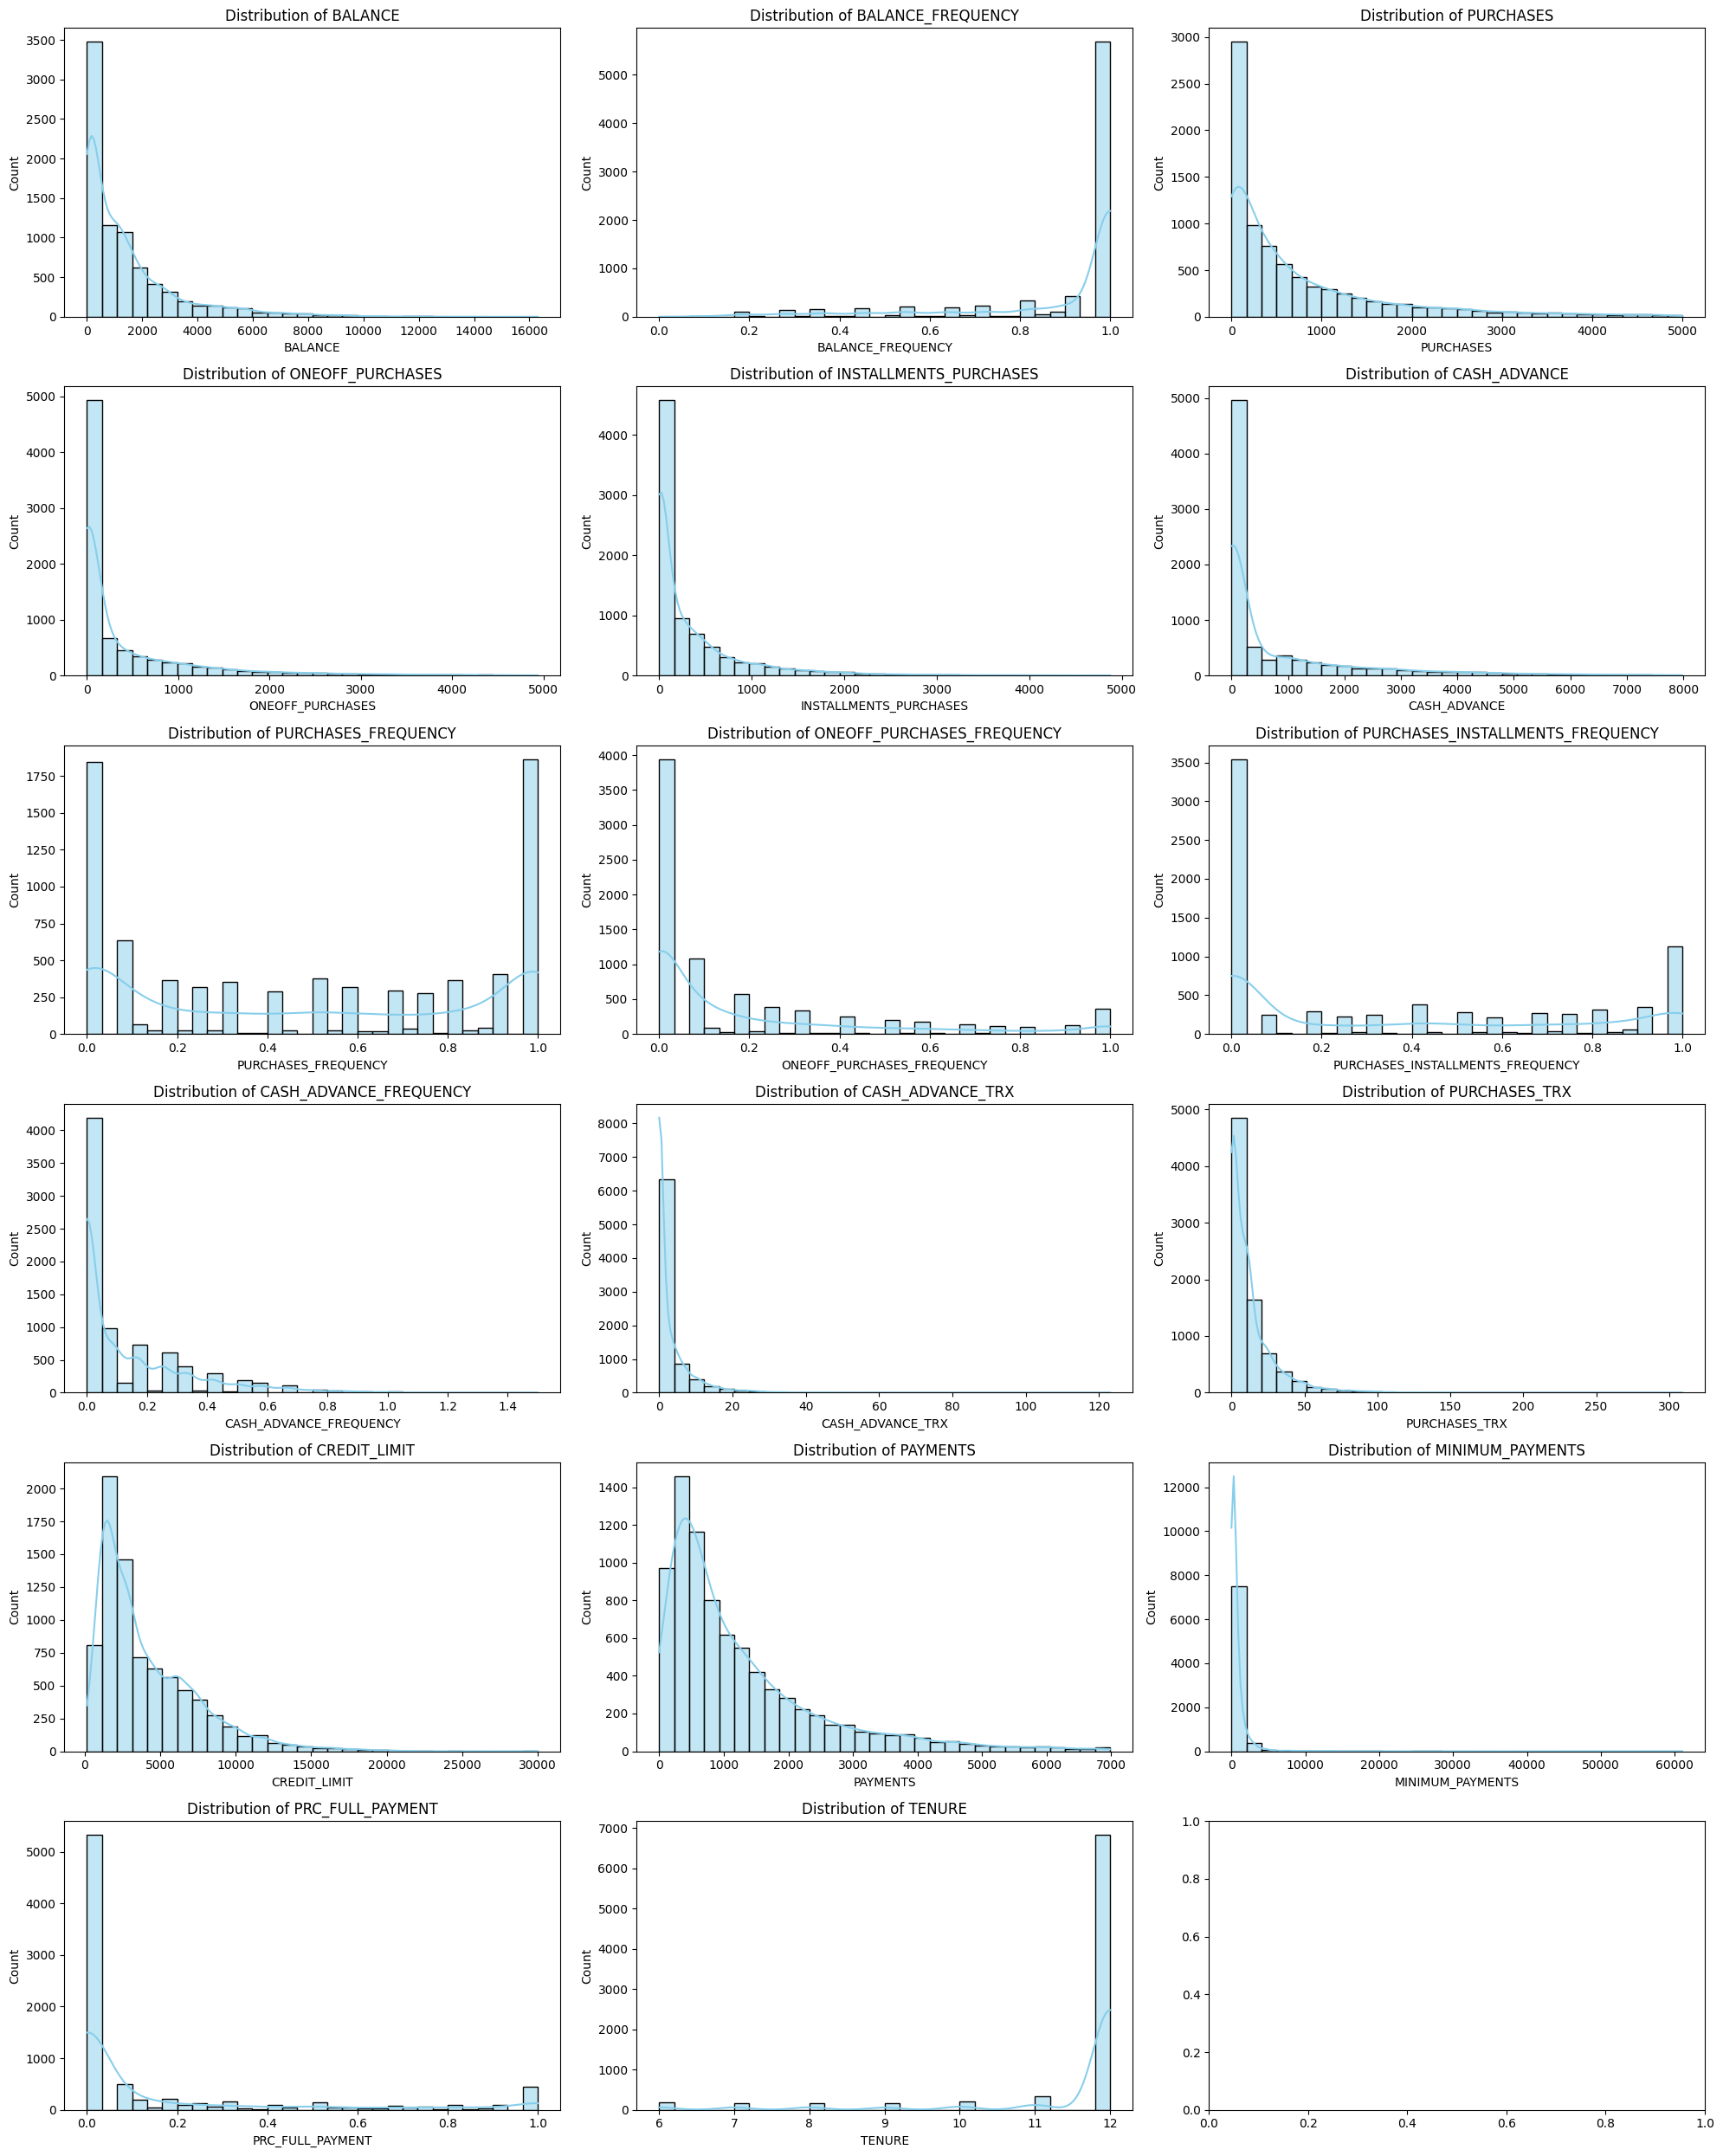

In [ ]:
numerical_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Setting up subplots for histplot
fig, axes = plt.subplots(6, 3, figsize=(20, 25))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting histplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column].dropna(), kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8061 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8061 non-null   object 
 1   BALANCE                           8061 non-null   float64
 2   BALANCE_FREQUENCY                 8061 non-null   float64
 3   PURCHASES                         8061 non-null   float64
 4   ONEOFF_PURCHASES                  8061 non-null   float64
 5   INSTALLMENTS_PURCHASES            8061 non-null   float64
 6   CASH_ADVANCE                      8061 non-null   float64
 7   PURCHASES_FREQUENCY               8061 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8061 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8061 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8061 non-null   float64
 11  CASH_ADVANCE_TRX                  8061 non-null   int64  
 12  PURCHASES_T

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your DataFrame is named 'df'

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating a new DataFrame for scaled features
scaled_df = df.copy()

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the selected numerical columns
scaled_df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Displaying the scaled DataFrame
print(scaled_df.head())


  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001 -0.741469          -0.356328  -0.655564         -0.555195  \
1  C10002  0.939424           0.077691  -0.753533         -0.555195   
2  C10003  0.563367           0.511709   0.040457          0.514317   
4  C10005 -0.328465           0.511709  -0.737102         -0.533062   
5  C10006  0.199007           0.511709   0.615650         -0.555195   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0               -0.432271     -0.564226            -0.802981  \
1               -0.606077      4.156329            -1.222089   
2               -0.606077     -0.564226             1.292556   
4               -0.606077     -0.564226            -1.012536   
5                1.822974     -0.564226             0.454342   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    -0.66401                         -0.701205  \
1                    -0.66401                         

In [ ]:
scaled_df = scaled_df.drop('CUST_ID', axis=1)

In [ ]:
desc_stats = scaled_df.describe()
print(desc_stats)

           BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count  8636.000000       8.636000e+03  8.636000e+03      8.636000e+03  \
mean      0.000000      -3.422716e-16  1.151876e-17     -3.291073e-17   
std       1.000058       1.000058e+00  1.000058e+00      1.000058e+00   
min      -0.764144      -4.309583e+00 -4.732082e-01     -3.591603e-01   
25%      -0.693469       6.767893e-02 -4.531953e-01     -3.591603e-01   
50%      -0.326598       5.054046e-01 -2.999696e-01     -3.324445e-01   
75%       0.240507       5.054046e-01  5.562856e-02     -3.444604e-03   
max       8.323708       5.054046e-01  2.215714e+01      2.384284e+01   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count            8.636000e+03  8.636000e+03         8.636000e+03  \
mean            -2.797412e-17 -4.278395e-17         6.582147e-18   
std              1.000058e+00  1.000058e+00         1.000058e+00   
min             -4.588390e-01 -4.686555e-01        -1.236139e+00   
25

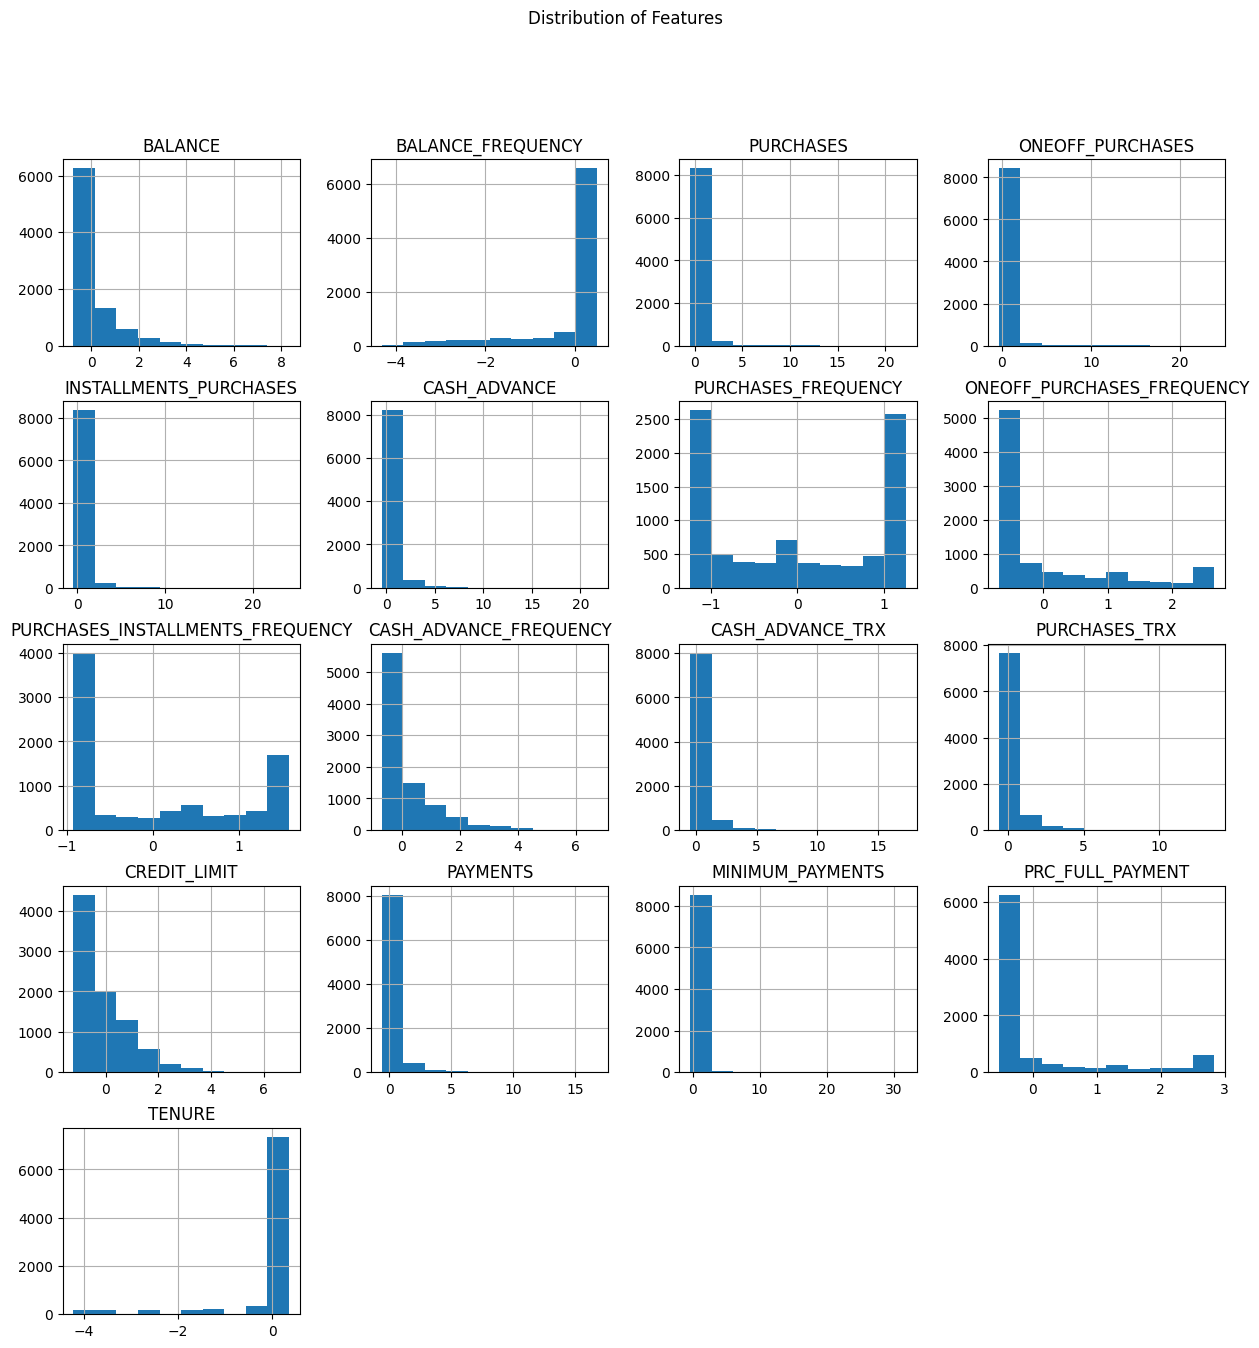

In [ ]:
import matplotlib.pyplot as plt

# Histograms
scaled_df.hist(figsize=(15, 15))
plt.suptitle("Distribution of Features")
plt.show()


In [ ]:
# Box plots for each scaled feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=scaled_df, orient='h', palette='Set2')
plt.title('Box Plots of Scaled Features')
plt.show()

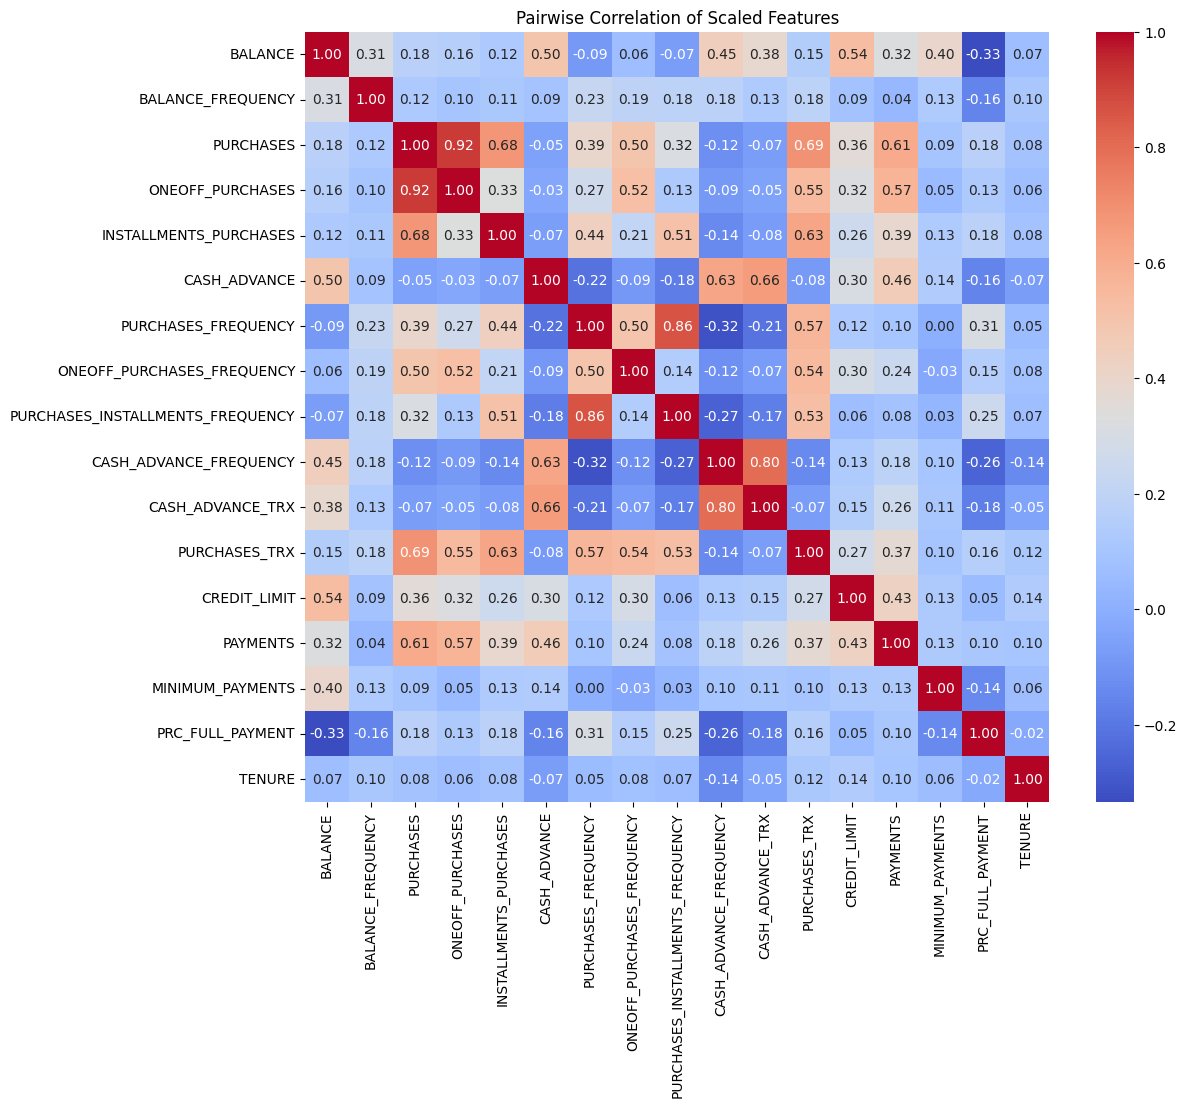

In [ ]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pairwise Correlation of Scaled Features')
plt.show()

Certainly! Let's derive insights from the correlation matrix to help with clustering and choosing the best features:

1. **High Positive Correlation:**
   - `PURCHASES` and `PURCHASES_TRX` have a high positive correlation of 0.70. This suggests that the number of purchases and the number of purchase transactions are closely related.

2. **High Positive Correlation with `CREDIT_LIMIT`:**
   - `CREDIT_LIMIT` has a notable positive correlation with `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, and `PAYMENTS`. This implies that customers with higher credit limits tend to make more purchases.

3. **Cash Advance Related Metrics:**
   - `CASH_ADVANCE` and `CASH_ADVANCE_TRX` are positively correlated, which is expected since the total cash advance is related to the number of cash advance transactions.

4. **Frequency Metrics:**
   - `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, and `PURCHASES_INSTALLMENTS_FREQUENCY` are positively correlated. Customers who make purchases more frequently also tend to make both one-off and installment purchases frequently.

5. **Negative Correlation with `PRC_FULL_PAYMENT`:**
   - There is a negative correlation between `PRC_FULL_PAYMENT` (percentage of full payment of the statement balance) and `CASH_ADVANCE_FREQUENCY`. Customers who make more frequent cash advances are less likely to fully pay their statement balances.

6. **Low Correlation:**
   - `TENURE` has low correlations with other features, indicating that the tenure of the customer does not strongly correlate with their purchasing behavior.

**Feature Selection for Clustering:**
- Based on the insights and to avoid multicollinearity, you might consider selecting features with significant correlations but not too high among themselves. For example, `PURCHASES`, `CREDIT_LIMIT`, and `CASH_ADVANCE` could be important features for clustering.

Remember, the choice of features should align with your business objectives and the specific insights you're seeking through clustering. It's also good practice to explore and visualize the data further to validate these insights.

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

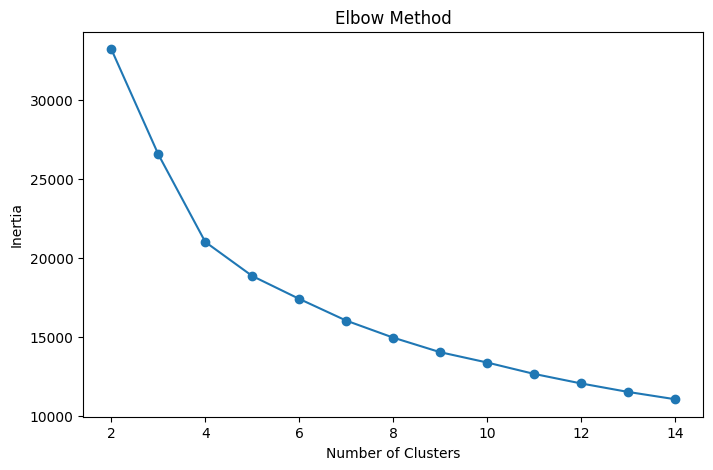

In [127]:

selected_features = ['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PAYMENTS']
X = scaled_df[selected_features]

inertia_values = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

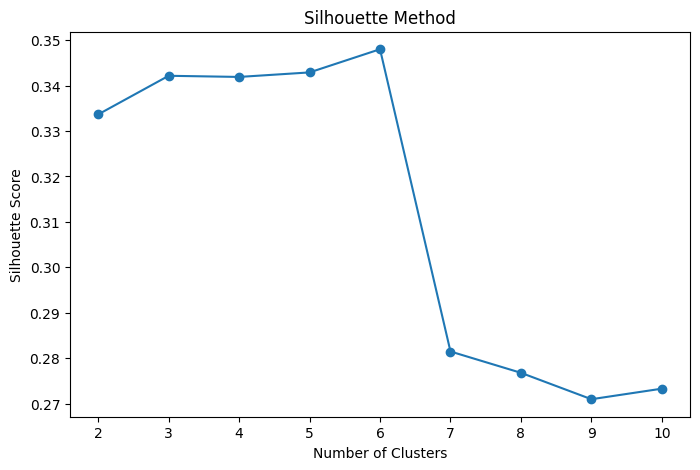

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette Method
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [1]:
# Selecting features
selected_features = ['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PAYMENTS']

# Extracting the selected features
X_selected = scaled_df[selected_features]

# Running K-means with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
scaled_df['KMeans_Clusters'] = kmeans.fit_predict(X_selected)

NameError: name 'scaled_df' is not defined

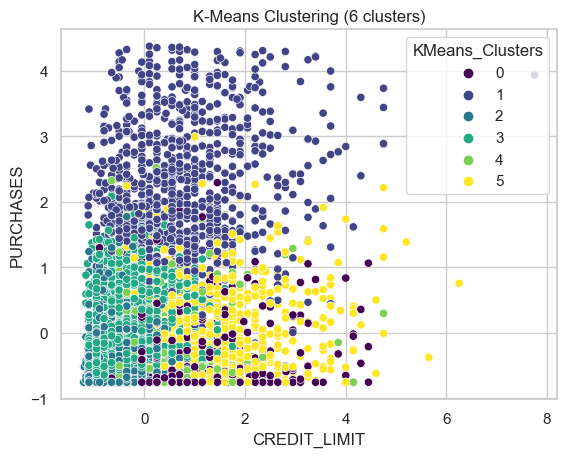

In [ ]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

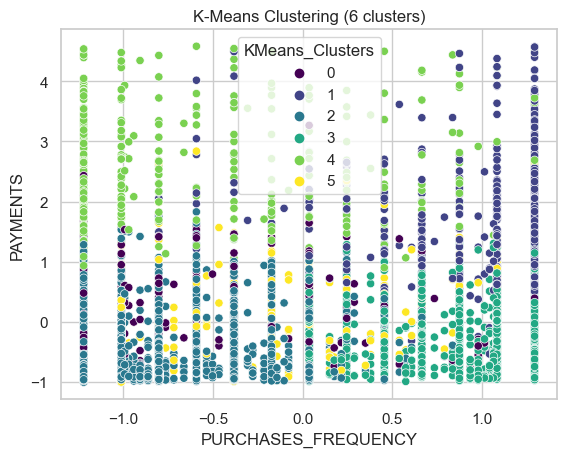

In [ ]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='PURCHASES_FREQUENCY', y='PAYMENTS', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

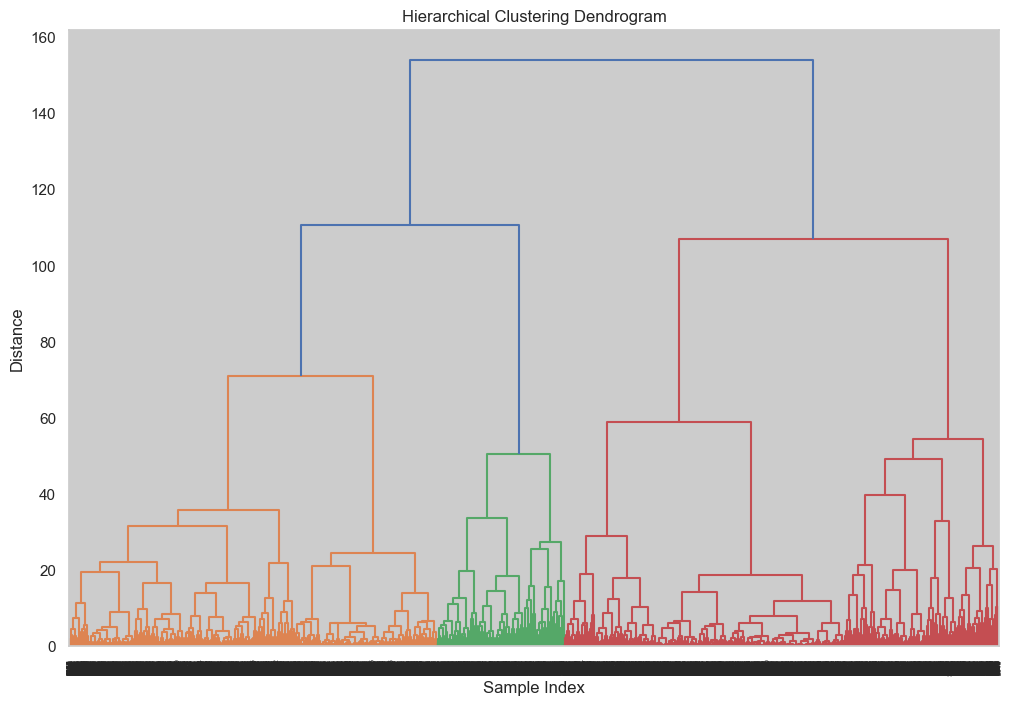

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Selecting features
selected_features = ['PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PAYMENTS']
df_selected = scaled_df[selected_features]

# Hierarchical clustering
linked = linkage(df_selected, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
